# Experimente mit DFS (python3, networkx)

### Einen gerichteten Graphen erstellen und darstellen:

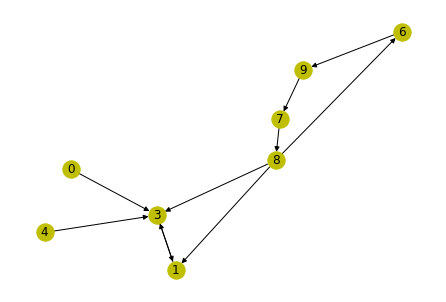

In [18]:
import networkx as nx
import numpy as np

np.random.seed(14)

n = 10
p = 0.1

G = nx.DiGraph()
edgelist = [(u,v) for u in range(n) for v in range(n) if np.random.random() < p]
G.add_edges_from(edgelist)

nx.draw(G, with_labels=True, node_color="y")

### Baum im DFS-Wald ausgeben, der in "source" gewurzelt ist:

In [ ]:
T = nx.dfs_tree(G, source=6)

nx.draw(T, with_labels=True, node_color="y")

### Knoten in Reihenfolge ihrer Entdeckung (Fertigstellung) ausgeben:

In [19]:
u = 6
print(list(nx.dfs_preorder_nodes(G, source=u)))
print(list(nx.dfs_postorder_nodes(G, source=u)))

[6, 9, 7, 8, 1, 3]
[3, 1, 8, 7, 9, 6]


### Stark zusammenhängende Komponenten mit Hilfe von DFS finden:

In [24]:
# ordne die Knoten anhand ihrer DFS finishing times
finish = list(nx.dfs_postorder_nodes(G))
print("Fnishing times: ", finish)

#kehre alle Kantenrichtungen um
G_rev = G.reverse(copy=True)

print("Strongly connected components:")

done = np.zeros(n, dtype=bool)
while len(finish) > 0:
    s = finish.pop()
    if done[s]:
        continue
    tree_nodes = nx.dfs_tree(G_rev, source=s).nodes()
    scc = []
    for u in tree_nodes:
        if not done[u]:
            scc.append(u)
        done[u] = True
    print(scc)

Fnishing times:  [1, 3, 0, 4, 8, 7, 9, 6]
Strongly connected components:
[6, 8, 7, 9]
[4]
[0]
[3, 1]


### Python Klassen:

In [ ]:
WHITE, GREY, BLACK = 0,1,2

class Node:
    def __init__(self):
        self.adjacents = [] #< leere Liste
        self.color = WHITE 
    
    def add_neighbor(self, u):
        self.adjacents.append(u)

### Iterieren:

In [ ]:
n = Node()
n.add_neihgbor(...)
for u in n.adjacents():
    print(u.color)